# **Question 1**
#### **Present the optimization methods:**


1.   Gradient Descent (GD): Batch Gradient Descent; Stochastic Gradient Descent (SGD); Mini-Batch Gradient Descent
2.   Momentum
3.   Adagrad (Adaptive Gradient Algorithm)
4.   RMSProp (Root Mean Square Propagation)
5.   Adam (Adaptive Moment Estimation)

#### **Write a program with a data set of your choice, test these methods and compare them.**



# **Bộ dữ liệu được chọn**


*   Concrete Compressive Strength.
*   Gồm 1030 mẫu, dùng để dự đoán cường độ nén của bê tông dựa trên các thành phần nguyên liệu như xi măng, nước,.. và tuổi bê tông.
*   Đường dẫn: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength


# **Import modules cần thiết**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, SGD

# **Import bộ dữ liệu**

In [ ]:
path = 'https://archive.ics.uci.edu/static/public/165/data.csv'

raw_df = pd.read_csv(path)

# **Hiển thị 5 dòng đầu tiên của bộ dữ liệu**

In [ ]:
raw_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# **Thống kê thông tin của từng thuộc tính trong bộ dữ liệu**

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# **Trực quan hóa dữ liệu bằng đồ thị**

*   **Biểu đồ Histogram**



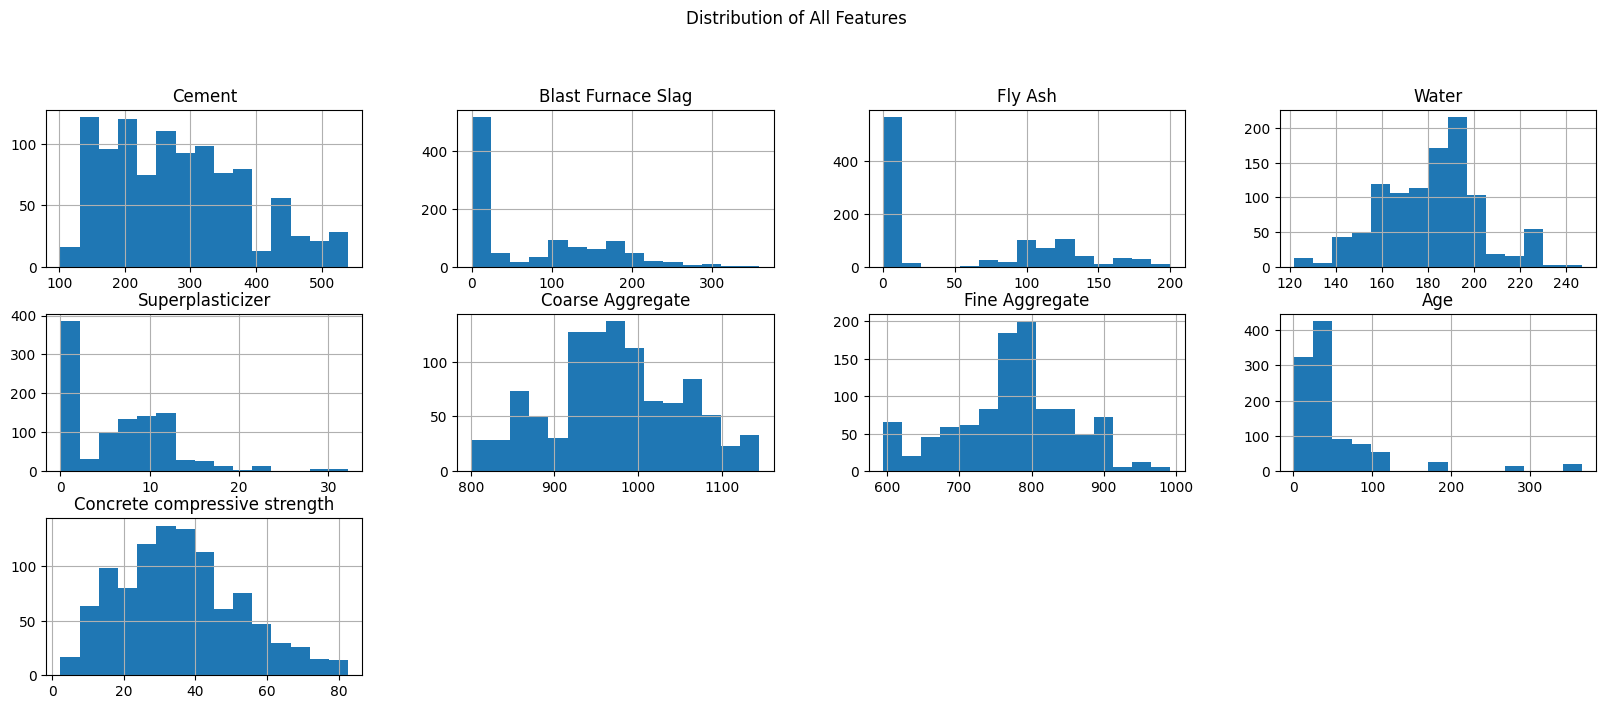

In [ ]:
raw_df.hist(bins=15, figsize=(20, 10), layout=(4, 4))
plt.suptitle("Distribution of All Features")
plt.show()



*   **Phân bổ giá trị của biến mục tiêu**




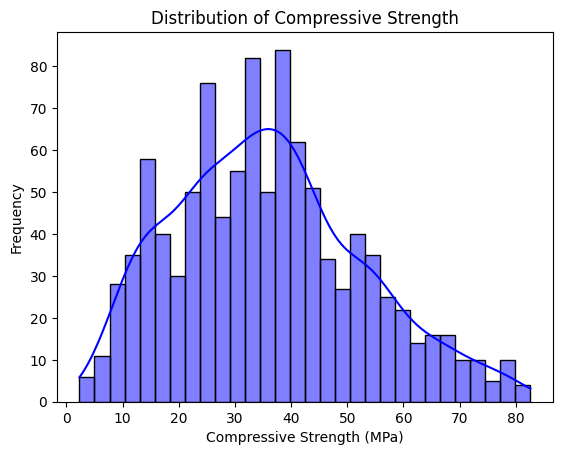

In [ ]:
sns.histplot(raw_df['Concrete compressive strength'], kde=True, bins=30, color='blue')
plt.title('Distribution of Compressive Strength')
plt.xlabel('Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.show()



*   **Biểu đồ Boxplot**




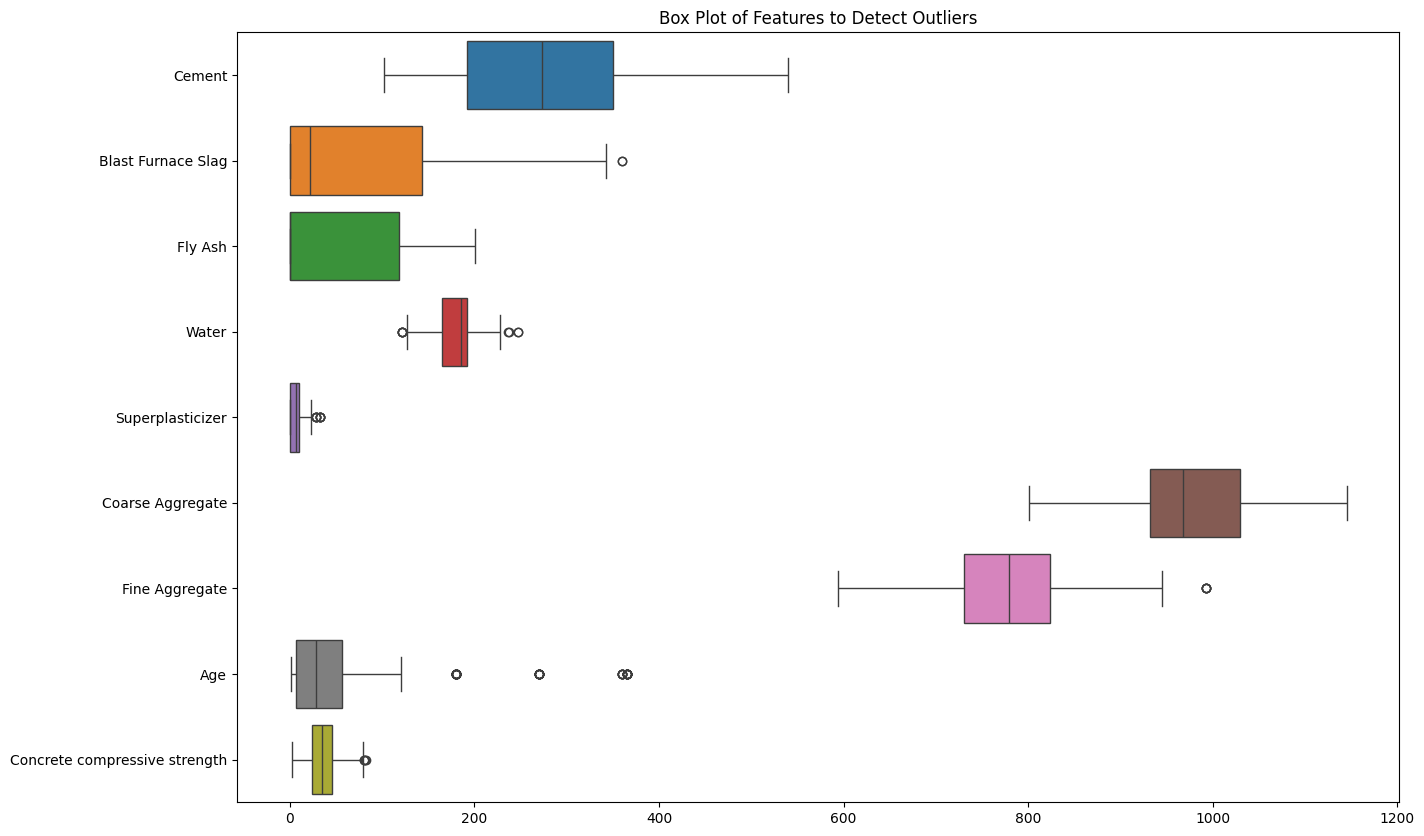

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=raw_df, orient='h')
plt.title("Box Plot of Features to Detect Outliers")
plt.show()

# **Tiền xử lý dữ liệu**



*   **Loại bỏ Missing Values (nếu có)**



In [ ]:
df = raw_df.copy()

df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0


*   **Type conversion và Data normalization**

In [ ]:
X = df.drop(['Concrete compressive strength'], axis=1)
y = df['Concrete compressive strength']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# **Chia dữ liệu thành tập train và test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# **Xây dựng mô hình**



In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1),
    ])
    return model

# **Huấn luyện mô hình bằng các optimizer**

In [ ]:
optimizers = {
    "Batch GD": SGD(),
    "Mini-Batch GD": SGD(),
    "SGD": SGD(),
    "Momentum": SGD(momentum=0.9),
    "Adagrad": Adagrad(),
    "RMSProp": RMSprop(),
    "Adam": Adam()
}

batch_sizes = {
    'Batch GD': len(X_train),
    'Mini-Batch GD': 16,
    'SGD': 1,
    'Momentum': 32,
    'Adagrad': 32,
    'RMSProp': 32,
    'Adam': 32
}

histories = {}
metrics = {
    "MSE": {},
    "MAE": {},
    "RMSE": {},
    "R2": {}
}

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name}")
    model = build_model()

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, batch_size=batch_sizes[name], epochs=100, validation_split=0.2, verbose=1)

    histories[name] = history.history

    y_pred = model.predict(X_test, verbose=0)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics["MSE"][name] = mse
    metrics["MAE"][name] = mae
    metrics["RMSE"][name] = rmse
    metrics["R2"][name] = r2


Training with Batch GD


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2838 - mae: 0.4813 - val_loss: 0.2509 - val_mae: 0.4571
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step - loss: 0.2520 - mae: 0.4480 - val_loss: 0.2232 - val_mae: 0.4268
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2250 - mae: 0.4180 - val_loss: 0.1993 - val_mae: 0.3989
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2017 - mae: 0.3903 - val_loss: 0.1785 - val_mae: 0.3731
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1815 - mae: 0.3650 - val_loss: 0.1604 - val_mae: 0.3494
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1639 - mae: 0.3419 - val_loss: 0.1446 - val_mae: 0.3280
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1486 - mae: 0.3207 - val_loss: 0.1309 - val_mae: 0.3086
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.1353 - mae: 0.3017 - val_loss: 0.1190 - val_mae: 0.2915
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1238 - mae: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1688 - mae: 0.3429 - val_loss: 0.0352 - val_mae: 0.1488
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0382 - mae: 0.1552 - val_loss: 0.0310 - val_mae: 0.1430
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351 - mae: 0.1504 - val_loss: 0.0291 - val_mae: 0.1384
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0336 - mae: 0.1491 - val_loss: 0.0276 - val_mae: 0.1349
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - mae: 0.1427 - val_loss: 0.0265 - val_mae: 0.1322
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281 - mae: 0.1367 - val_loss: 0.0254 - val_mae: 0.1297
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0302 - mae: 0.1419 - val_loss: 0.0244 - val_mae: 0.1271
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0284 - mae: 0.1358 - val_loss: 0.0236 - val_mae: 0.1250
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 - mae: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


659/659 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0426 - mae: 0.1602 - val_loss: 0.0243 - val_mae: 0.1272
Epoch 2/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0219 - mae: 0.1183 - val_loss: 0.0212 - val_mae: 0.1192
Epoch 3/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0171 - mae: 0.1059 - val_loss: 0.0157 - val_mae: 0.1002
Epoch 4/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0181 - mae: 0.1082 - val_loss: 0.0144 - val_mae: 0.0954
Epoch 5/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0165 - mae: 0.1019 - val_loss: 0.0135 - val_mae: 0.0910
Epoch 6/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0154 - mae: 0.0981 - val_loss: 0.0139 - val_mae: 0.0939
Epoch 7/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0148 - mae: 0.0974 - val_loss: 0.0135 - val_mae: 0.0892
Epoch 8/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0139 - mae: 0.0938 - val_loss: 0.0128 - val_mae: 0.0900
Epoch 9/100
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Momentum
Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1258 - mae: 0.2877 - val_loss: 0.0312 - val_mae: 0.1433
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0394 - mae: 0.1568 - val_loss: 0.0273 - val_mae: 0.1362
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0306 - mae: 0.1403 - val_loss: 0.0232 - val_mae: 0.1249
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mae: 0.1283 - val_loss: 0.0209 - val_mae: 0.1178
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 - mae: 0.1157 - val_loss: 0.0189 - val_mae: 0.1118
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - mae: 0.1123 - val_loss: 0.0174 - val_mae: 0.1067
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 - mae: 0.1102 - val_loss: 0.0170 - val_mae: 0.1047
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mae: 0.1101 - val_loss: 0.0158 - val_mae: 0.1005
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Adagrad
Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2386 - mae: 0.4411 - val_loss: 0.1706 - val_mae: 0.3700
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1694 - mae: 0.3579 - val_loss: 0.1304 - val_mae: 0.3148
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1333 - mae: 0.3109 - val_loss: 0.1053 - val_mae: 0.2766
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1112 - mae: 0.2782 - val_loss: 0.0877 - val_mae: 0.2479
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0900 - mae: 0.2450 - val_loss: 0.0741 - val_mae: 0.2241
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0795 - mae: 0.2244 - val_loss: 0.0634 - val_mae: 0.2037
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0732 - mae: 0.2132 - val_loss: 0.0549 - val_mae: 0.1873
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0590 - mae: 0.1907 - val_loss: 0.0482 - val_mae: 0.1741
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0524 - mae: 0.1788 - val_loss: 0.0324 - val_mae: 0.1476
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mae: 0.1210 - val_loss: 0.0158 - val_mae: 0.1009
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mae: 0.1106 - val_loss: 0.0199 - val_mae: 0.1165
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mae: 0.0994 - val_loss: 0.0145 - val_mae: 0.0980
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mae: 0.1025 - val_loss: 0.0120 - val_mae: 0.0850
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mae: 0.1013 - val_loss: 0.0185 - val_mae: 0.1083
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mae: 0.0879 - val_loss: 0.0114 - val_mae: 0.0817
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mae: 0.0780 - val_loss: 0.0105 - val_mae: 0.0799
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mae: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1383 - mae: 0.3060 - val_loss: 0.0326 - val_mae: 0.1493
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365 - mae: 0.1562 - val_loss: 0.0229 - val_mae: 0.1230
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 - mae: 0.1291 - val_loss: 0.0194 - val_mae: 0.1126
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mae: 0.1179 - val_loss: 0.0173 - val_mae: 0.1061
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - mae: 0.1061 - val_loss: 0.0158 - val_mae: 0.1014
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - mae: 0.1026 - val_loss: 0.0136 - val_mae: 0.0926
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 - mae: 0.0917 - val_loss: 0.0122 - val_mae: 0.0859
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 - mae: 0.0890 - val_loss: 0.0120 - val_mae: 0.0871
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - mae: 0.

# **Biểu đồ so sánh quá trình huấn luyện của từng Optimizers**

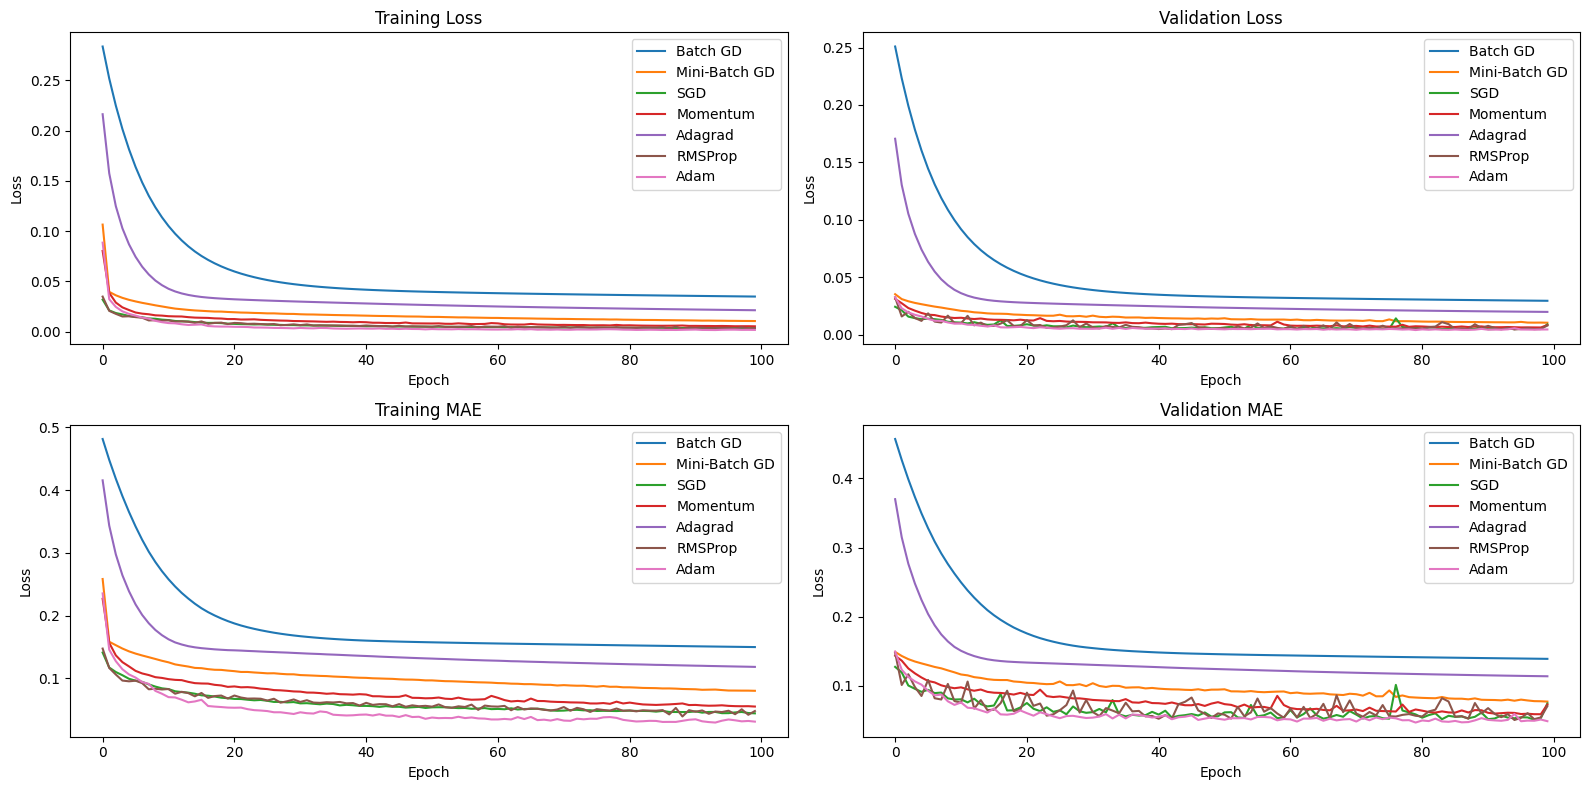

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history['loss'], label=opt_name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history['val_loss'], label=opt_name)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
for opt_name, history in histories.items():
    plt.plot(history['mae'], label=opt_name)
plt.title('Training MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
for opt_name, history in histories.items():
    plt.plot(history['val_mae'], label=opt_name)
plt.title('Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Biểu đồ so sánh hiệu suất mô hình với từng Optimzers**

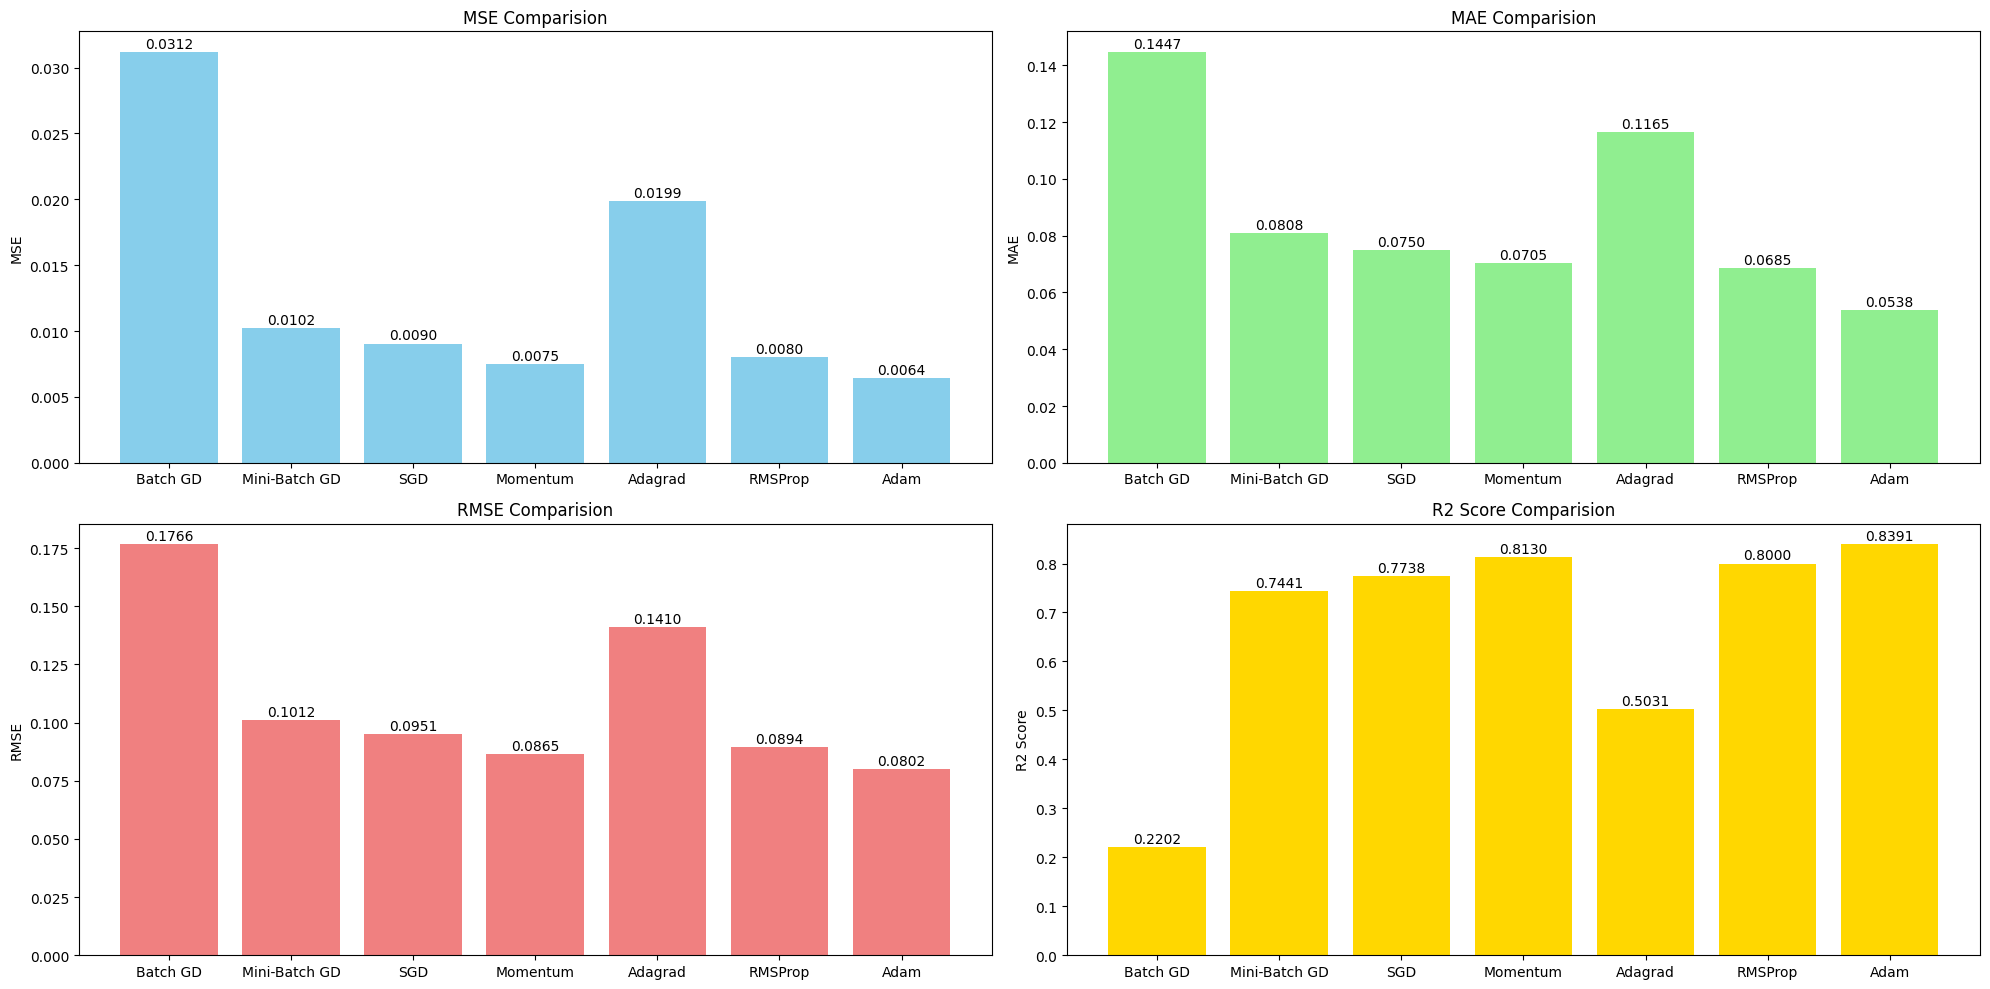

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))



axes[0, 0].bar(metrics["MSE"].keys(), metrics["MSE"].values(), color='skyblue')
axes[0, 0].set_title("MSE Comparision")
axes[0, 0].set_ylabel("MSE")
for i, v in enumerate(metrics["MSE"].values()):
    axes[0, 0].text(i, v + 0.01 * max(metrics["MSE"].values()), f'{v:.4f}', ha='center', fontsize=10)

axes[0, 1].bar(metrics["MAE"].keys(), metrics["MAE"].values(), color='lightgreen')
axes[0, 1].set_title("MAE Comparision")
axes[0, 1].set_ylabel("MAE")
for i, v in enumerate(metrics["MAE"].values()):
    axes[0, 1].text(i, v + 0.01 * max(metrics["MAE"].values()), f'{v:.4f}', ha='center', fontsize=10)

axes[1, 0].bar(metrics["RMSE"].keys(), metrics["RMSE"].values(), color='lightcoral')
axes[1, 0].set_title("RMSE Comparision")
axes[1, 0].set_ylabel("RMSE")
for i, v in enumerate(metrics["RMSE"].values()):
    axes[1, 0].text(i, v + 0.01 * max(metrics["RMSE"].values()), f'{v:.4f}', ha='center', fontsize=10)

axes[1, 1].bar(metrics["R2"].keys(), metrics["R2"].values(), color='gold')
axes[1, 1].set_title("R2 Score Comparision")
axes[1, 1].set_ylabel("R2 Score")
for i, v in enumerate(metrics["R2"].values()):
    axes[1, 1].text(i, v + 0.01 * max(metrics["R2"].values()), f'{v:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()